In [1]:
import atd2022
import torch
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sktime.performance_metrics.forecasting import (
    MeanAbsoluteScaledError,
    MeanSquaredError,
)
import my_mod as util
from models import CnnForecaster
from tools import dotdict

In [2]:
import torch
torch.cuda.is_available()

True

# Small Scale Test for GPU support

In [3]:
torch.cuda.set_device(2) 

In [12]:
args = dotdict()
args.epochs=30
args.lr=0.001

In [13]:
truth = atd2022.io.read_csv()

In [14]:
test = truth[["AA", "AC"]]

In [15]:
lispCNN = CnnForecaster(args)

In [16]:
lispCNN.fit(data=test)

0
epochs 1/30


/scratch/wzong/anaconda3/envs/atd2022/lib/python3.9/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([1, 20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


train_loss 97.81111907958984
epochs 2/30
train_loss 90.6580581665039
epochs 3/30
train_loss 89.51567840576172
epochs 4/30
train_loss 89.06400299072266
epochs 5/30
train_loss 88.91309356689453
epochs 6/30
train_loss 90.05628967285156
epochs 7/30
train_loss 88.30117797851562
epochs 8/30
train_loss 87.83351135253906
epochs 9/30
train_loss 87.39701843261719
epochs 10/30
train_loss 87.45558166503906
epochs 11/30
train_loss 87.129638671875
epochs 12/30
train_loss 87.18343353271484
epochs 13/30
train_loss 86.92073822021484
epochs 14/30
train_loss 87.058349609375
epochs 15/30
train_loss 86.93949890136719
epochs 16/30
train_loss 87.24431610107422
epochs 17/30
train_loss 86.73563385009766
epochs 18/30
train_loss 86.47142791748047
epochs 19/30
train_loss 86.35235595703125
epochs 20/30
train_loss 86.25939178466797
epochs 21/30
train_loss 86.0979995727539
epochs 22/30
train_loss 86.13009643554688
epochs 23/30
train_loss 85.82706451416016
epochs 24/30
train_loss 85.76769256591797
epochs 25/30
train_

In [17]:
res=lispCNN.predict(test.tail(4).index)

In [18]:
res

AA                                                    \
                        1    2    3    4    5    6    7    8    9    10   11   
2018-01-15/2018-01-21  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  2.0  3.0   
2018-01-22/2018-01-28  2.0  2.0  3.0  3.0  2.0  2.0  3.0  2.0  3.0  1.0  2.0   
2018-01-29/2018-02-04  3.0  2.0  2.0  2.0  2.0  3.0  2.0  2.0  2.0  2.0  3.0   
2018-02-05/2018-02-11  2.0  2.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  2.0  3.0   

                                                                     AC       \
                        12   13   14   15   16   17   18   19   20   1    2    
2018-01-15/2018-01-21  3.0  3.0  4.0  3.0  2.0  3.0  3.0  3.0  3.0  7.0  6.0   
2018-01-22/2018-01-28  2.0  2.0  1.0  2.0  1.0  2.0  2.0  3.0  3.0  3.0  3.0   
2018-01-29/2018-02-04  3.0  2.0  2.0  2.0  2.0  2.0  2.0  3.0  2.0  4.0  3.0   
2018-02-05/2018-02-11  2.0  2.0  2.0  2.0  1.0  2.0  2.0  2.0  2.0  3.0  2.0   

                                                                              \
                        3    4    5    6    7    8    9    10   11   12   13   
2018-01-15/2018-01-21  7.0  7.0  8.0  6.0  6.0  7.0  7.0  9.0  8.0  7.0  8.0   
2018-01-22/2018-01-28  5.0  6.0  6.0  3.0  5.0  5.0  5.0  6.0  5.0  4.0  5.0   
2018-01-29/2018-02-04  2.0  4.0  2.0  3.0  3.0  2.0  4.0  4.0  5.0  3.0  3.0   
2018-02-05/2018-02-11  2.0  3.0  1.0  3.0  2.0  2.0  3.0  3.0  4.0  3.0  2.0   

                                                          
                        14   15   16   17   18   19   20  
2018-01-15/2018-01-21  7.0  7.0  7.0  7.0  8.0  7.0  8.0  
2018-01-22/2018-01-28  3.0  6.0  3.0  5.0  6.0  5.0  6.0  
2018-01-29/2018-02-04  3.0  5.0  3.0  4.0  4.0  4.0  4.0  
2018-02-05/2018-02-11  2.0  3.0  2.0  2.0  3.0  3.0  3.0

# Full Scale Test

In [3]:
args = dotdict()
args.epochs=20
args.lr=0.001

In [4]:
lispCNN = CnnForecaster(args)

In [5]:
 # Load data
truth = atd2022.io.read_csv()

# Subset the data for the sake of making this fast.
# Remove if you want to run the example on the entire dataset.
truth = truth.head(108)

# Experiment Parameters
window = 100
num_predict = 4
gap = 0
slide = 1

# Create a dataset `Splitter` object for generating train/test splits
splitter = atd2022.backtest.Splitter(
    truth,
    window,
    num_predict,
    gap,
    slide,
    expanding=True,
) 

In [ ]:
 # Populate a list of models that support the `atd2022.forecasters.Forecaster` protocol
# with which will we generate historical forecasts
models = [
    lispCNN,
    atd2022.forecasters.PredictMeanForecaster(),
    atd2022.forecasters.ExponentiallyWeightedMovingAverage(),
]

# Compute historical forecasts for all models
predictions = [
    atd2022.backtest.historical_forecast(model, splitter, verbose=True)
    for model in models
]

<models.CnnForecaster object at 0x7fc9f0449c70>:   0%|          | 0/5 [00:00<?, ?it/s]

0
epochs 1/20


/scratch/wzong/anaconda3/envs/atd2022/lib/python3.9/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([1, 20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


train_loss 98.919189453125
epochs 2/20
train_loss 88.76370239257812
epochs 3/20
train_loss 85.2449951171875
epochs 4/20
train_loss 82.8165512084961
epochs 5/20
train_loss 81.47932434082031
epochs 6/20
train_loss 81.12451171875
epochs 7/20
train_loss 81.48138427734375
epochs 8/20
train_loss 84.61048126220703
epochs 9/20
train_loss 82.79790496826172
epochs 10/20
train_loss 80.7283935546875
epochs 11/20
train_loss 78.99767303466797
epochs 12/20
train_loss 78.91021728515625
epochs 13/20
train_loss 78.79752349853516
epochs 14/20
train_loss 79.0165023803711
epochs 15/20
train_loss 78.99394226074219
epochs 16/20
train_loss 79.90994262695312
epochs 17/20
train_loss 79.35710144042969
epochs 18/20
train_loss 79.66502380371094
epochs 19/20
train_loss 78.50117492675781
epochs 20/20
train_loss 78.60191345214844
1
epochs 1/20
train_loss 168.35516357421875
epochs 2/20
train_loss 164.544921875
epochs 3/20
train_loss 164.12185668945312
epochs 4/20
train_loss 163.71450805664062
epochs 5/20
train_loss 16

train_loss 22.960872650146484
epochs 11/20
train_loss 22.938364028930664
epochs 12/20
train_loss 22.912471771240234
epochs 13/20
train_loss 22.874300003051758
epochs 14/20
train_loss 22.834627151489258
epochs 15/20
train_loss 22.81456756591797
epochs 16/20
train_loss 22.775653839111328
epochs 17/20
train_loss 22.744901657104492
epochs 18/20
train_loss 22.699054718017578
epochs 19/20
train_loss 22.70534896850586
epochs 20/20
train_loss 22.672876358032227
11
epochs 1/20
train_loss 15725.5625
epochs 2/20
train_loss 15445.3662109375
epochs 3/20
train_loss 15411.3984375
epochs 4/20
train_loss 15378.830078125
epochs 5/20
train_loss 15357.126953125


Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<models.CnnForecaster object at 0x7f40202f5e50>,5.071391,224.720522
PredictMeanForecaster(),1.459343,74.146892
ExponentiallyWeightedMovingAverage(span=3),1.591927,81.234780


MeanAbsoluteScaledError  \
model                                           n                            
<models.CnnForecaster object at 0x7f40202f5e50> 0                 4.734058   
                                                1                 4.815558   
                                                2                 5.276170   
                                                3                 5.459779   
ExponentiallyWeightedMovingAverage(span=3)      0                 1.210449   
                                                1                 1.607165   
                                                2                 1.743103   
                                                3                 1.806993   
PredictMeanForecaster()                         0                 1.438947   
                                                1                 1.432186   
                                                2                 1.446583   
                                                3                 1.519656   

                                                   MeanSquaredError  
model                                           n                    
<models.CnnForecaster object at 0x7f40202f5e50> 0        209.258996  
                                                1        211.837703  
                                                2        228.463502  
                                                3        235.875779  
ExponentiallyWeightedMovingAverage(span=3)      0         59.782868  
                                                1         79.974515  
                                                2         86.659919  
                                                3         89.252260  
PredictMeanForecaster()                         0         69.110252  
                                                1         71.046277  
                                                2         71.629932  
                                                3         74.645810

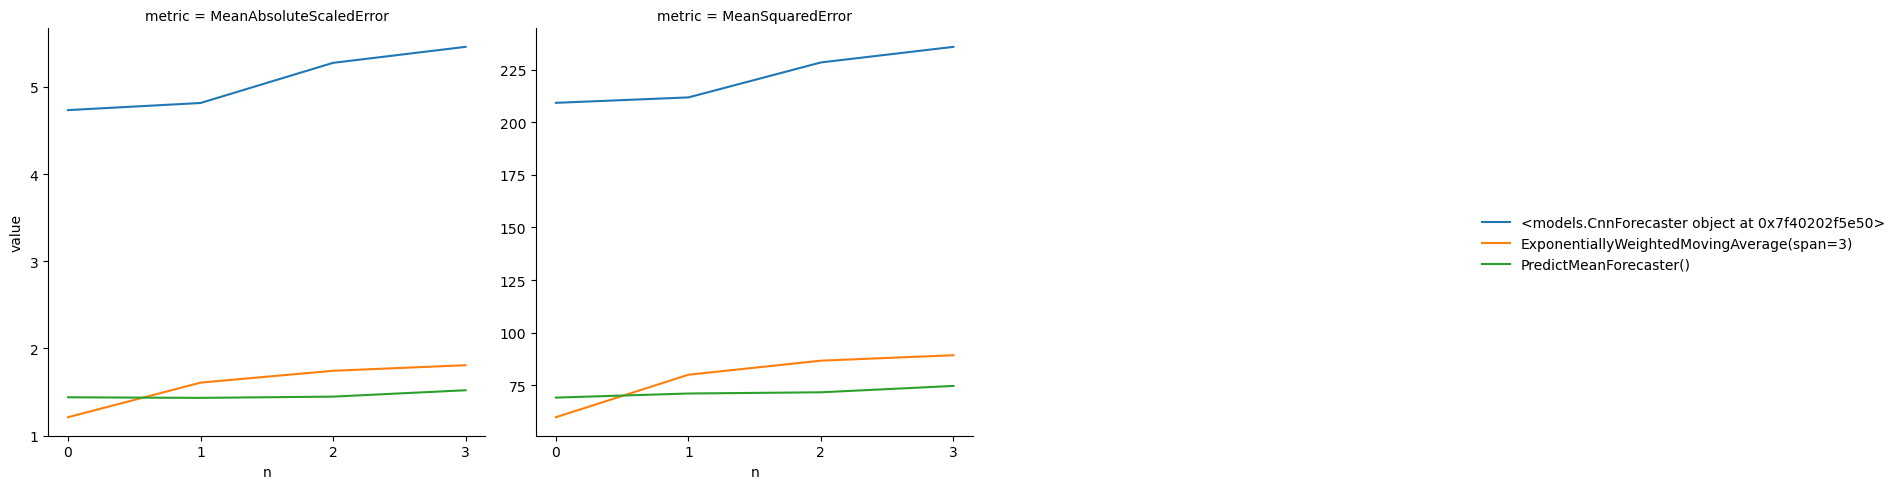

In [20]:
 metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<models.CnnForecaster object at 0x7f9238ac5820>,4.311949,195.407062
PredictMeanForecaster(),1.459343,74.146892
ExponentiallyWeightedMovingAverage(span=3),1.591927,81.234780


MeanAbsoluteScaledError  \
model                                           n                            
<models.CnnForecaster object at 0x7f9238ac5820> 0                 4.261976   
                                                1                 4.253263   
                                                2                 4.280487   
                                                3                 4.452069   
ExponentiallyWeightedMovingAverage(span=3)      0                 1.210449   
                                                1                 1.607165   
                                                2                 1.743103   
                                                3                 1.806993   
PredictMeanForecaster()                         0                 1.438947   
                                                1                 1.432186   
                                                2                 1.446583   
                                                3                 1.519656   

                                                   MeanSquaredError  
model                                           n                    
<models.CnnForecaster object at 0x7f9238ac5820> 0        189.469671  
                                                1        190.960039  
                                                2        190.644272  
                                                3        199.171399  
ExponentiallyWeightedMovingAverage(span=3)      0         59.782868  
                                                1         79.974515  
                                                2         86.659919  
                                                3         89.252260  
PredictMeanForecaster()                         0         69.110252  
                                                1         71.046277  
                                                2         71.629932  
                                                3         74.645810

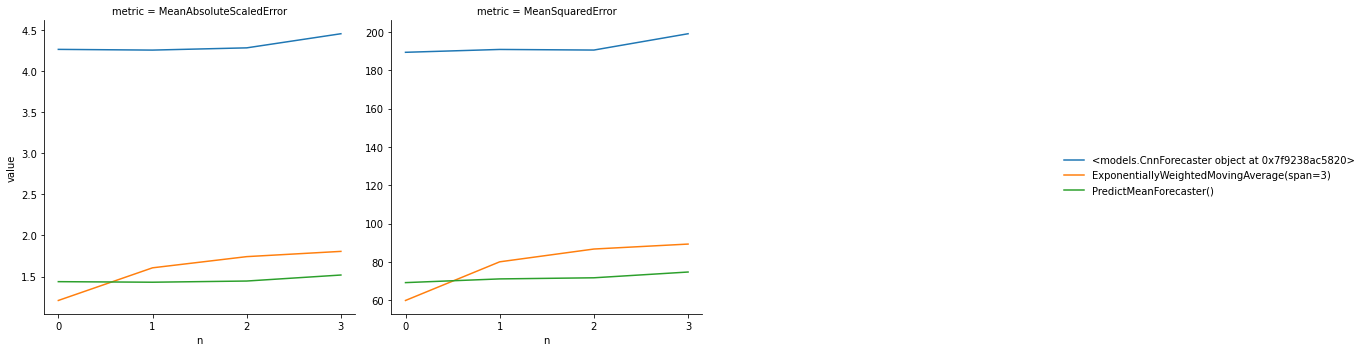

In [24]:
 metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))